<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP3/TP3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Estadística paramétrica y curva ROC

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar aplicativos que permitan dar solvencia a los problemas propuestos en la materia.
## Objetivos Específicos
*   Analizar estadísticamente el comportamiento de los valores descritos en los dataset propuestas.
*   Mediante el umbral proponer un clasificador de mínimo error utilizando la curva ROC.
*   Visualización de resultados

###Problema
Dados los datasets de la situación epidemiológica y sanitaria de Bahía Blanca en los últimos meses (https://datos.bahia.gob.ar/dataset?groups=covid19), responder las siguientes interrogantes: 
  *   ¿Hay variables que puedan ser razonablemente consideradas normales?
  *   ¿Hay variables que tienen un comportamiento sospechoso?

Generar un dataset (dos conjuntos Gaussianos con diferente media y DS, N=50 C/U, uno con etiqueta A y otro con etiqueta B. Realizar las siguientes acciones:
  *   Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error
  *   Evaluar alguno de los parámetros de calidad (exactitud, precisión, f-measure)
  *   Recalcular para algunas variantes (cambio de valor umbral, cambiando la media de los grupos, etc.)
  *   ¿Como se podría hacer no supervisado al proceso?

###Solución
Se plantea posibles soluciones, para el primer problema se desarrolla un aplicativo que permita al usuario visualizar los datos epidemiológicos como DataFrame para posterior representarlas mediante gráficas. La visualización permite verificar si alguna variable tiende a un comportamiento sospechoso. Para dar solución al segundo problema, se desarrolla un aplicativo que concatena y ordena los datos para posterior graficar su curva ROC

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
#Función norm_dist: Retorna 2 dataset con distribución normal 
def norm_dist(loc_1, scale_1, size_1, loc_2, scale_2, size_2):
    size_1 = int(size_1/2)
    size_2= int(size_2/2)
    A_dis = np.random.normal(loc_1,scale_1,size_1)                      
    B_dis = np.random.normal(loc_2,scale_2,size_2)
    At = np.around(np.random.uniform(1, 5, size=50),size_1)
    At2 = np.around(np.random.uniform(1, 5, size=50),size_2)

    A_df = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_1))
    A_df['Valor'] = A_dis
    A_df['Etiqueta'] = 'A'
    A_df['Atributo'] = At

    B_df = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_1))
    B_df['Etiqueta'] = 'B'
    B_df['Valor'] = A_dis
    B_df['Atributo'] = At2

    df1 = pd.concat([A_df, B_df])

    A_df1 = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_2))
    A_df1['Valor'] = B_dis
    A_df1['Etiqueta'] = 'C'
    A_df1['Atributo'] = At

    B_df1 = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_2))
    B_df1['Etiqueta'] = 'D'
    B_df1['Valor'] = B_dis
    B_df1['Atributo'] = At2

    df2 = pd.concat([A_df1, B_df1])

    return df1, df2

In [16]:
#@title Seleccione los parámetros para la distribución normal Dataset 1 { run: "auto" }
loc_1 = 30 #@param {type:"slider", min:30, max:60, step:5}
scale_1 = 10 #@param {type:"slider", min:1, max:10, step:1}
size_1 = 100 #@param {type:"slider", min:50, max:150, step:25}

In [17]:
#@title Seleccione los parámetros para la distribución normal Dataset 2 { run: "auto" }
loc_2 = 40 #@param {type:"slider", min:40, max:80, step:5}
scale_2 = 10 #@param {type:"slider", min:0, max:10, step:2}
size_2 = 100 #@param {type:"slider", min:50, max:150, step:25}

In [18]:
dataset1, dataset2 = norm_dist (loc_1, scale_1, size_1, loc_2, scale_2, size_2)
#Función describe, retorna parámetros como: percentiles, desviación STD, media, número de datos
dataset1.describe()

,Valor,Atributo
count,100.000000,100.000000
mean,30.025865,3.004059
std,9.964561,1.211435
min,12.556848,1.011182
25%,22.863743,1.971528
50%,28.707550,3.021346
75%,35.248920,4.144914
max,53.065101,4.968496


In [19]:
dataset2.describe()

,Valor,Atributo
count,100.000000,100.000000
mean,40.620364,3.004059
std,8.648946,1.211435
min,22.671704,1.011182
25%,33.718140,1.971528
50%,41.400534,3.021346
75%,46.813927,4.144914
max,59.463875,4.968496


In [20]:
dataset1.sample(100)

,Etiqueta,Valor,Atributo
35,B,36.120962,3.861303
44,A,45.445028,2.083603
11,B,31.905509,4.965289
37,A,13.363286,3.979554
11,A,31.905509,4.188016
...,...,...,...
0,B,28.510011,3.206130
13,A,28.705264,1.137698
23,B,34.714271,2.025240
33,B,17.317224,1.011182


In [21]:
dataset2.sample(10)

,Etiqueta,Valor,Atributo
22,D,42.825206,2.203275
10,C,22.671704,4.191406
48,C,36.703245,1.999668
34,C,34.559824,1.437530
27,C,32.588834,4.703156
7,C,41.642285,3.932825
30,D,33.718140,1.719896
29,D,32.315940,1.084067
41,C,34.920294,2.393715
37,D,30.595300,3.676002


In [22]:
#Concatenación de los dataset
df = pd.concat([dataset1, dataset2])

In [23]:
#Se ordenan los datos
df_ord = df
df_ord.sort_values('Valor', inplace=True, ignore_index=True)
df_ord

,Etiqueta,Valor,Atributo
0,A,12.556848,3.932825
1,B,12.556848,4.339975
2,B,12.651806,3.023400
3,A,12.651806,4.844330
4,B,13.257754,1.696654
...,...,...,...
195,C,57.609104,4.188016
196,C,57.776426,2.683839
197,D,57.776426,2.256854
198,D,59.463875,4.613633


In [24]:
print("forma del dataset")
print(df_ord.Valor.shape)

forma del dataset
(200,)


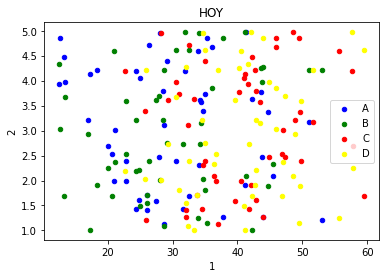

In [25]:
fig = df_ord[df_ord.Etiqueta == 'A'].plot(kind='scatter', x='Valor', y='Atributo', color='blue', label='A')
df_ord[df_ord.Etiqueta == 'B'].plot(kind='scatter', x='Valor', y='Atributo', color='green', label='B', ax=fig)
df_ord[df_ord.Etiqueta == 'C'].plot(kind='scatter', x='Valor', y='Atributo', color='red', label='C', ax=fig)
df_ord[df_ord.Etiqueta == 'D'].plot(kind='scatter', x='Valor', y='Atributo', color='yellow', label='D', ax=fig)
fig.set_xlabel('1')
fig.set_ylabel('2')
fig.set_title('HOY')
plt.show()